## 1. Contexte : la preuve du concept,


Je vais tester la portabilité de la base de données Floupics sous MongoDB qui est aussi un SGBD mais cette fois de type NoSQL. Je reviendrai sur cette différence fondamentale dans le 3ème point, la création de la base de données permettra de mieux l'illustrer.

Je vais me concentrer sur le fichier movies.csv mais aussi présenter un test avec le fichier ratings pour bien comprendre comment il faudra aborder le projet si nous retenons par la suite cette solution.

Mais tout d'abord, procédons à l'installation qui est relativement simple en local.

---

## 2. Installation MongoDB et pymongo

### 2.1 MongoDB :

En suivant le tutoriel de mogodb, nous avons le choix pour 2 configurations d'installation sous WIndows.

L'avantage de MongoDB est qu'il est multiplateforme, open source (community version), distribué (répartissable sur un nombre quelconque de machines), scalable (il va s'adapter à de très grandes bases de données hétérogènes) et il gère les replicaset (cela va nous permettre d'anticiper d'éventuelles pannes de serveur).

J'ai opté pour l'installation en tant que service Windows. L'autre type d'installation étant un peu plus long à mettre en oeuvre, mais permet de configurer plus finement en fonction de notre infrastructure réseau.

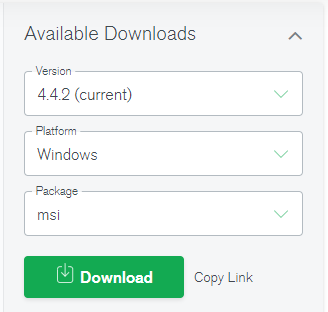

L'installation de MongoDB Compass s'effectue dans la foulée et qui est une interface graphique nous permettant de visualiser les données et gérer également la base.

Par la suite, on doit activer le Shell de MongoDB mongo.exe et mongod.exe. On peut les activer via n'importe quel autre Shell en modifiant les valeurs environnementales de Windows en indiquant le répertoire d'installation :

"C:\Program Files\MongoDB\Server\4.4\bin\".

Grâce au Shell nous pouvons vérifier le bon fonctionnement de MongoDB :

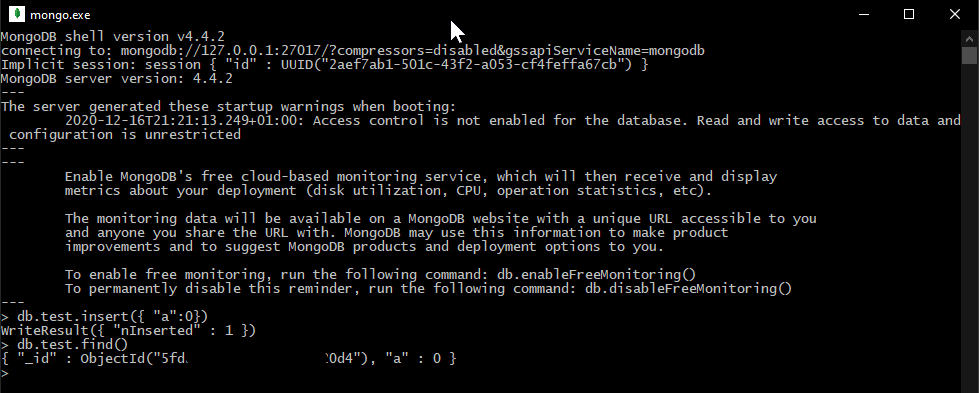

### 2.2 pymongo :

Après l'installation en local et la vérification fonctionnelle de MongoDB et MongoDB Compass, on installe dans l'environnement virtuel le module pymongo. Ce denier nous permettra de gérer les fonctions de mongoDB à l'aide de code Python.

On vérifie avec un pip list si le module est installé, si ce n'est pas le cas, il suffit d'éxecuter la commande suivante dans un shell pour l'installer dans le dossier qui héberge l'environnement virtuel :

python -m pip install pymongo

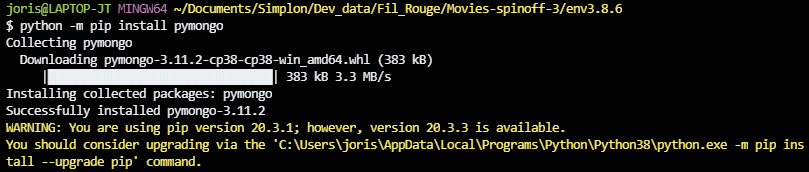

Test si le module est fonctionnel : si l'éxecution de la cellule ci-dessous ne retourne pas de message d'erreur, le module est bien installé

In [1]:
import pymongo

---

## 3. Création de la base de données, collection et documents :

MongoDB comme de nombreuses bases de données est basé sur le CRUD :

Create Read Update Delete, ce sont les opérations de base.

A contrarion des SGBDR, on ne parle pas de tables ni de d'enregistrements. 

Voici un tableau synthétique qui permet de mieux appréhender le vocabulaire pour MongoDB :

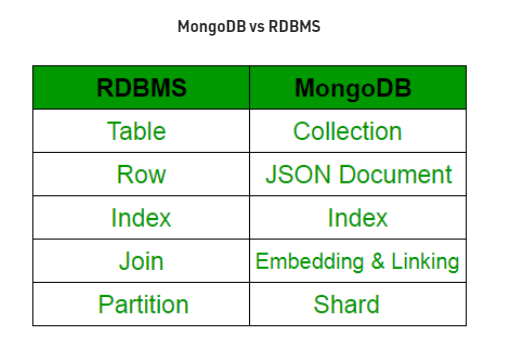

Donc dans l'ordre nous allons paramétrer :

    3.1. la base de données qui va recevoir >
    3.2. une ou des collections (tables en SGBDR), donc movies et ratings dans notre test qui vont à leur tour recevoir >
    3.3. les documents (correspond aux enregistrements)

### 3.1 La base de données :

In [2]:
from pymongo import MongoClient
#permet la création du client qui va se connecter à MongoDB
client = MongoClient()

Création du dossier qui va recevoir les bases de données : on aurait pu le faire à la fin de l'installation du programme.
    
A l'aide de l'interprète de commande Windows :
    
cd C:\
md "\data\db"

In [3]:
#Préparation à la création de la base de données Floupics_MBDD.
db = client.Floupics_MBDD   

### 3.2 La collection :

In [4]:
"""Préparation à la création de la collection "movies_collection" dans la
base de données Floupics_MBDD.
Cette collection est en quelque sorte l'équivalent de la table en SGBDR.

MongoDB étant du type "lazy", Floupics_MBDD et movies_collection ne seront créés
qu'à l'insertion du premier document, dans notre cas, movies.csv"""
collection = db.movies_collection   

### 3.3 Les documents :

In [5]:
"""Ce programme permet d'intégrer un fichier CSV dans MongoDB, on verra une autre option par la suite,
on peut convertir d'abord le CSV en fichier JSON"""

import csv 

def import_csv(csvFilePath): 

    #1, on créé le dictionnaire qui va recevoir les données du CSV 
    data = [] 
    
    #2, on ouvre le CSV et on utilise la fonction .dictreader pour préparer la conversion 
    with open(csvFilePath, encoding='utf-8') as csvf: 
        csvReader = csv.DictReader(csvf) 

    #3, on convertit chaque ligne en dictionnaire et ajout dans le dictionnaire data temporaire 
        for row in csvReader:
            data.append(row)
    return data
            

# On paramètre ici les chemins d'accès aux fichiers 
csvFilePath = r'C:\Users\joris\Documents\Simplon\Dev_data\Fil_Rouge\Movies-spinoff-3\movies-spinoff-mongodb\movies_dataset_small\movies.csv'

In [6]:
movies = import_csv(csvFilePath)

In [7]:
result = collection.insert_many(movies)
result.inserted_ids

[ObjectId('5fdbe9df619d8a49692a9911'),
 ObjectId('5fdbe9df619d8a49692a9912'),
 ObjectId('5fdbe9df619d8a49692a9913'),
 ObjectId('5fdbe9df619d8a49692a9914'),
 ObjectId('5fdbe9df619d8a49692a9915'),
 ObjectId('5fdbe9df619d8a49692a9916'),
 ObjectId('5fdbe9df619d8a49692a9917'),
 ObjectId('5fdbe9df619d8a49692a9918'),
 ObjectId('5fdbe9df619d8a49692a9919'),
 ObjectId('5fdbe9df619d8a49692a991a'),
 ObjectId('5fdbe9df619d8a49692a991b'),
 ObjectId('5fdbe9df619d8a49692a991c'),
 ObjectId('5fdbe9df619d8a49692a991d'),
 ObjectId('5fdbe9df619d8a49692a991e'),
 ObjectId('5fdbe9df619d8a49692a991f'),
 ObjectId('5fdbe9df619d8a49692a9920'),
 ObjectId('5fdbe9df619d8a49692a9921'),
 ObjectId('5fdbe9df619d8a49692a9922'),
 ObjectId('5fdbe9df619d8a49692a9923'),
 ObjectId('5fdbe9df619d8a49692a9924'),
 ObjectId('5fdbe9df619d8a49692a9925'),
 ObjectId('5fdbe9df619d8a49692a9926'),
 ObjectId('5fdbe9df619d8a49692a9927'),
 ObjectId('5fdbe9df619d8a49692a9928'),
 ObjectId('5fdbe9df619d8a49692a9929'),
 ObjectId('5fdbe9df619d8a

In [8]:
#permet de vérifier la liste des collections créées :
db.list_collection_names()

['movies_collection']

In [9]:
collection = db["movies_collection"]

#permet de vérifier le nombre de documents importés dans la collection 
total_count = collection.count_documents({}) 
print("Total number of documents : ", total_count) 

Total number of documents :  9742


### 3.3 bonus Les documents : conversion en JSON au préalable

!! A NE PAS LANCER SOUS RISQUE DE CUMUL DES DONNEES !!

In [ ]:
"""Ce programme permet de convertir un fichier CSV en JSON,
pour intégration ensuite dans MongoDB"""

import csv 
import json 

# Fonction pour convertir du format CSV au format JSON 
# On définit les chemins d'accès aux fichiers 
def make_json(csvFilePath, jsonFilePath): 

    #1, on créé le dictionnaire qui va recevoir les données du CSV 
    data = [] 

    #2, on ouvre le CSV et on utilise la fonction .dictreader pour préparer la conversion 
    with open(csvFilePath, encoding='utf-8') as csvf: 
        csvReader = csv.DictReader(csvf)
        #3, on convertit chaque ligne en dictionnaire et ajout dans le dictionnaire data temporaire 
        for row in csvReader:
            data.append(row)
    
    #3, on ouvre un fichier JSON et on y ajoute les données 
    with open(jsonFilePath, 'w', encoding='utf-8') as jsonf: 
        jsonf.write(json.dumps(data, indent=4)) 

# On paramètre ici les chemins d'accès aux fichiers 
csvFilePath = r'C:\Users\joris\Documents\Simplon\Dev_data\Fil_Rouge\Movies-spinoff-3\movies-spinoff-mongodb\movies_dataset_small\movies.csv'
jsonFilePath = r'C:\Users\joris\Documents\Simplon\Dev_data\Fil_Rouge\Movies-spinoff-3\movies-spinoff-mongodb\movies_dataset_small\JSON\movies.json'

# Appelle la fonction make_json 
make_json(csvFilePath, jsonFilePath)

A cette étape, on a créé le fichier au format JSON que l'on peut intégrer en tant que document dans movies_collection

In [ ]:
# Loading or Opening the json file 
with open(r'C:\Users\joris\Documents\Simplon\Dev_data\Fil_Rouge\Movies-spinoff-3\movies-spinoff-mongodb\movies_dataset_small\JSON\movies.json') as file: 
    file_data = json.load(file) 
      
# Inserting the loaded data in the Collection 
    collection.insert_many(file_data)   


In [ ]:
collection = db["movies_collection"]

# number of documents in the collection 
total_count = collection.count_documents({}) 
print("Total number of documents : ", total_count) 

Encore un bonus : site internet qui propose de convertir en ligne les fichiers CSV sous différents formats.

https://www.convertcsv.com/csv-to-json.htm

Nous allons nous intéresser maintenant aux différences avec une SGBDR surtout si l'on souhaite intégrer les données du fichier ratings.csv.

C’est quoi MongoDB :

MongoDB est un système de base de donnée orienté objet, dynamique, stable, scalable et sans SQL. Les objets sont stockés sous format BSON (Le BSON est un format binaire dans lequel zéro ou plusieurs couples de clé-valeur sont stockés dans une seule entité, appelée document [(source : wikipedia)](https://fr.wikipedia.org/wiki/BSON)) dans des documents séparés.
Au lieu de stocker les données sous format de tables avec des valeurs, on utilise une hierarchie et un système d’objet JSON pour créer un système plus adaptatif.

MongoDB vs SQL :

La grande majorité des bases de données fonctionnent sous SQL. Que ce soit sqlite, postgres ou même Mysql, le langage de base est commun. Mongodb appartient à la famille des langages NoSQL. Le code et les fonctionnalités sont donc fondamentalement différentes.

La ou le SQL va utiliser un système de tables et de relations complexes, MongoDB fonctionne assez simplement. On crée un document avec des données en arbre. Il est ensuite possible de relier ces documents avec des liens par _id

Le gros avantage de MongoDB par rapport au SQL, c’est sa capacité à gérer des systèmes de données complexes. On peux avoir des listes, des objets encapsulés sans avoir de soucis.

Ce fonctionnement facilite grandement le développement d’applications qui gèrent beaucoup de données. Avec un peu d’entraînement, il est possible de créer des modèles de documents extrêmement bien organisés, ce qui fait gagner du temps.

Les inconvénients de MongoDB :

Il est important de les prendre en compte lors de votre décision :

+ Ne fonctionne pas avec un système de tables, vous devez donc apprendre comment créer des schémas de documents
+ Des transactions complexes
+Pas de système direct pour créer des liens entre les documents

Dans quelle situation choisir MongoDB ?

Voici une liste des types d’applications qui fonctionnent très bien avec MongoDb :

+ Un site de e commerce
+ Les blogs et la gestion de contenu
+ Des applications de gestion en temps réel
+ Les réseaux sociaux

En conclusion : 

MongoDB est un système de base de donnée très performant. Il ne fonctionne pas avec du SQL, vous devrez donc apprendre un nouveau langage. Les données sont stockées sous forme de documents JSON, il est donc possible de créer des arbres complexes. [(source : le blog du codeur)](https://leblogducodeur.fr/pourquoi-utiliser-mongodb/)

Donc si l'on souhaite ajouter le fichier ratings.csv et les autres jeu de données, il faudra revoir complètement notre organisation des données :
- soit créer des collections diverses et les lier,
- soit les combiner.

---

## 4. Visualisations suite aux scripts :

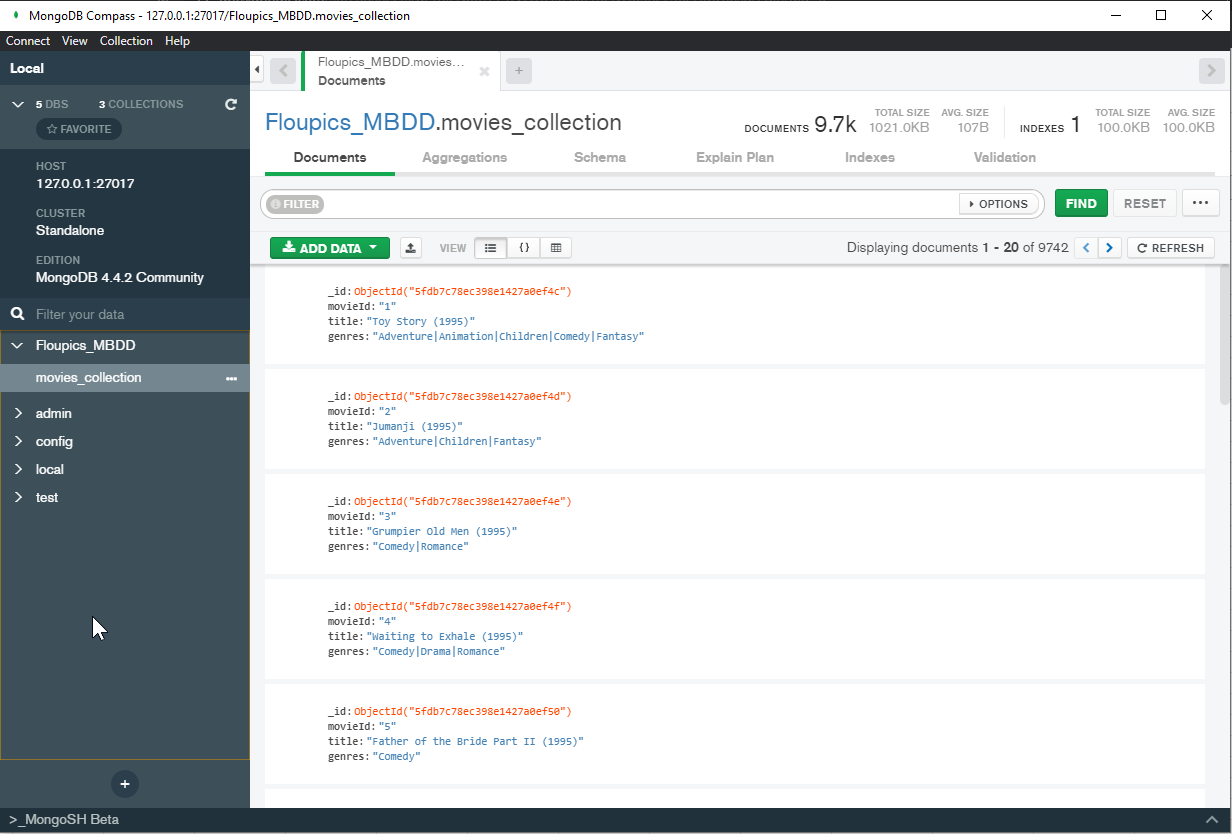

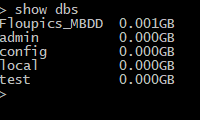

---